In [ ]:
#I executed the crawler using the telnet server. I copied the code below and pasted
#it in an editor and saved the file as spider2.py
#Then I executed the following code in the telnet sever and created the box.json file.  
#scrapy runspider spider2.py -o box.json
#below the cell below I show the output of box.json file.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess
import logging
logging.getLogger('scrapy').setLevel(logging.WARNING)


class spider2(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "Boxoffice"
    
    # URL(s) to start with.
    start_urls = ['https://www.imdb.com/chart/boxoffice']

    # Use XPath to parse the response we get.
    def parse(self, response):
        for e in response.css('div#boxoffice>table>tbody>tr'):
            yield {
                'title': ''.join(e.css('td.titleColumn>a::text').extract()).strip(),
                'weekend': ''.join(e.css('td.ratingColumn')[0].css('::text').extract()).strip(),
                'gross': ''.join(e.css('td.ratingColumn')[1].css('span.secondaryInfo::text').extract()).strip(),
                'weeks': ''.join(e.css('td.weeksColumn::text').extract()).strip(),
                'image': e.css('td.posterColumn img::attr(src)').extract_first(),
            }

In [1]:
#Show the output of te box.json
import pandas as pd

firstpage = pd.read_json('box.json', orient='records')
print(firstpage.shape)
print(firstpage.head())

(10, 5)
     gross                                              image  \
0   $73.4M  https://m.media-amazon.com/images/M/MV5BMTY1OT...   
1   $62.8M  https://m.media-amazon.com/images/M/MV5BNzY3Nz...   
2  $316.5M  https://m.media-amazon.com/images/M/MV5BOTk5OD...   
3    $7.2M  https://m.media-amazon.com/images/M/MV5BMjMzOT...   
4  $169.0M  https://m.media-amazon.com/images/M/MV5BMjMwND...   

                               title weekend  weeks  
0                              Glass  $18.9M      2  
1                         The Upside  $11.9M      3  
2                            Aquaman   $7.3M      6  
3          The Kid Who Would Be King   $7.2M      1  
4  Spider-Man: Into the Spider-Verse   $6.1M      7  


In [19]:
new_df = firstpage.groupby(['title','weekend']).sum()['weeks']
new_df

title                              weekend
A Dog's Way Home                   $5.1M       3
Aquaman                            $7.3M       6
Escape Room                        $4.1M       4
Glass                              $18.9M      2
Green Book                         $5.5M      11
Mary Poppins Returns               $3.3M       6
Serenity                           $4.4M       1
Spider-Man: Into the Spider-Verse  $6.1M       7
The Kid Who Would Be King          $7.2M       1
The Upside                         $11.9M      3
Name: weeks, dtype: int64

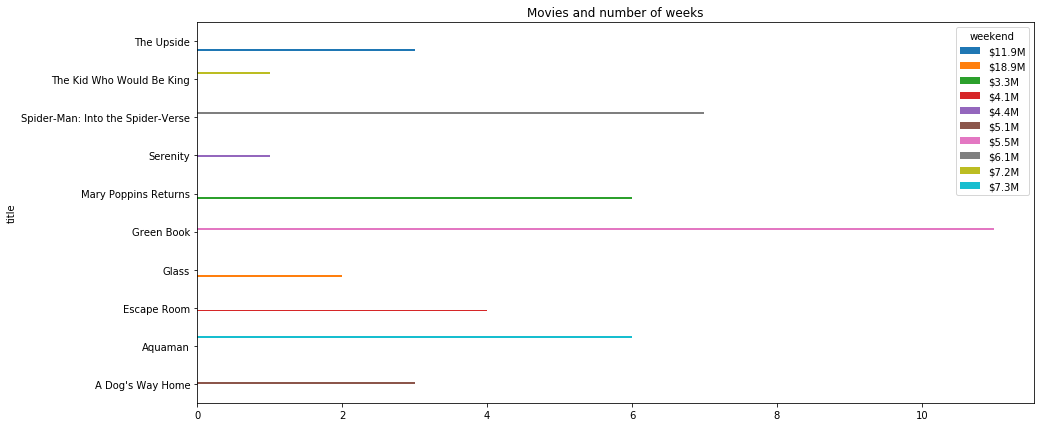

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
new_df = firstpage.groupby(['title','weekend']).sum()['weeks'].unstack().plot(kind='barh',ax=ax, title='Movies and number of weeks')

In [ ]:
#The graph above shows the movies and the number of weeks they ran in the box. 
#one interesting find is the longest movie Green book ran the longest but it wasn't the 
#highest grossing movie. The highest grossing movie Glass ran the least amount of time. 
#now the timing of when the movie was released could definitly impact the number of weeks. 
#for example, Glass was just recently release so it makes sense it has the fewest number of
#weeks. 